22. You have a DataFrame df with a column 'A' of integers. For example:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
How do you filter out rows which contain the same integer as the row immediately above?
23. Given a DataFrame of numeric values, say
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
how do you subtract the row mean from each element in the row?
24. Suppose you have DataFrame with 10 columns of real numbers, for example:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
Which column of numbers has the smallest sum? (Find that column's label.)
25. How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?
The next three puzzles are slightly harder...
26. You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries 
                                               in each row are NaN values. For each row of the DataFrame, find the column
                                               which contains the third NaN value.
(You should return a Series of column labels.)
27. A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                 'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
For each group, find the sum of the three greatest values.
28. A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group 
  of 10 consecutive integers in 'A' (i.e. (0, 10], (10, 20], ...), calculate 
the sum of the corresponding values in column 'B'.
[11:39]
Consider a DataFrame df where there is an integer column 'X':
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). 
    These values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.
Here's an alternative approach based on a cookbook recipe:
30. Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations 
    of the 3 largest values.
31. Given a DataFrame with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals', replace any 
    negative values in 'vals' with the group mean.
32. Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following 
    DataFrame:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                     'value': [1, 2, 3, np.nan, 2, 3,
                               np.nan, 1, 7, 3, np.nan, 8]})> >> df
 group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
The goal is to compute the Series:
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being
    NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute 
    the mean (3+3)/2)

22. You have a DataFrame df with a column 'A' of integers. For example:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
How do you filter out rows which contain the same integer as the row immediately above?

In [1]:
import pandas as pd
from pandas import *
import seaborn

In [13]:
df=DataFrame({'A':[1,2,2,3,4,5,5,5,6,7,7]})

In [14]:
df.drop_duplicates()

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [15]:
df

,A
0,1
1,2
2,2
3,3
4,4
5,5
6,5
7,5
8,6
9,7


23. Given a DataFrame of numeric values, say
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
how do you subtract the row mean from each element in the row?

In [5]:
import numpy as np
from numpy import *

df=DataFrame(random.random(size=(5,3)))

In [36]:
df-(df.mean(axis=1))

,0,1,2,3,4
0,-0.176879,-0.201133,0.108396,NaN,NaN
1,-0.478109,0.251843,0.001696,NaN,NaN
2,0.440553,-0.127547,0.181180,NaN,NaN
3,0.264199,0.271099,-0.400814,NaN,NaN
4,0.402366,0.431356,-0.085205,NaN,NaN


In [23]:
df

,0,1,2
0,0.353735,0.344496,0.893610
1,0.052505,0.797472,0.786911
2,0.971167,0.418082,0.966395
3,0.794812,0.816729,0.384400
4,0.932980,0.976985,0.700009


In [56]:
df.sub(df.mean(axis=1),axis=0)

,0,1,2
0,-0.176879,-0.186118,0.362997
1,-0.493124,0.251843,0.241282
2,0.185952,-0.367133,0.181180
3,0.129498,0.151415,-0.280913
4,0.062988,0.106994,-0.169982


In [44]:
0.344496-0.621040

-0.276544

In [34]:
1.591841/3

0.5306136666666667

In [45]:
df.mean(axis=1)

0    0.530614
1    0.545629
2    0.785214
3    0.665314
4    0.869991
dtype: float64

In [26]:
0.344496-0.621040

-0.276544

24. Suppose you have DataFrame with 10 columns of real numbers, for example:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
Which column of numbers has the smallest sum? (Find that column's label.)

In [62]:
df=DataFrame(random.random(size=(5,10)),columns=list('abcdefghej'))


In [72]:
df.sum().idxmin()

'b'

In [75]:
df.sum()

a    2.166666
b    1.877563
c    2.574244
d    1.946366
e    2.771143
f    2.869080
g    2.226023
h    3.111621
e    2.094823
j    3.009523
dtype: float64

In [63]:
df

,a,b,c,d,e,f,g,h,e,j
0,0.800089,0.695509,0.884724,0.463407,0.592165,0.102934,0.436208,0.053628,0.341171,0.656128
1,0.203849,0.101492,0.324252,0.384155,0.167527,0.910896,0.114429,0.905561,0.328166,0.559455
2,0.701181,0.877167,0.373554,0.354282,0.708395,0.622860,0.345365,0.986879,0.516947,0.234730
3,0.084062,0.013327,0.699759,0.370546,0.585945,0.409050,0.617493,0.606699,0.810143,0.665604
4,0.377485,0.190067,0.291955,0.373977,0.717111,0.823340,0.712528,0.558854,0.098395,0.893604


25. How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?
The next three puzzles are slightly harder...

In [14]:
df=DataFrame(array([[1,1,1,1],[2,2,2,2],[1,1,1,1],[3,3,3,3]]))
df

,0,1,2,3
0,1,1,1,1
1,2,2,2,2
2,1,1,1,1
3,3,3,3,3


In [17]:
unique(df,axis=0)

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

26. You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries 
                                               in each row are NaN values. For each row of the DataFrame, find the column
                                               which contains the third NaN value.
(You should return a Series of column labels.)

In [ ]:
#################################################  *****************************

27. A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                 'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
For each group, find the sum of the three greatest values.

In [26]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),          ###################???????????????
         'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

In [33]:
df.groupby(by='grps')['vals'].nlargest(3)#.sum()

grps    
a     1     345
      7      52
      0      12
b     12     57
      8      54
      4      45
c     10    235
      14     87
      9      23
Name: vals, dtype: int64

In [30]:
df

,grps,vals
0,a,12
1,a,345
2,a,3
3,b,1
4,b,45
5,c,14
6,a,4
7,a,52
8,b,54
9,c,23


In [31]:
a=df.groupby(by='grps').max()
a

,vals
grps,
a,345
b,57
c,235


In [32]:
df1=df[df['vals']!=345]  ## droping the raws having the maximum number in the group
df2=df1[df['vals']!=57]
df3=df2[df['vals']!=235]
b=df3.groupby(by='grps').max()
b

C:\Users\roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,vals
grps,
a,52
b,54
c,87


In [33]:
df4=df3[df['vals']!=52]
df5=df4[df['vals']!=54]
df6=df5[df['vals']!=87]
c=df6.groupby(by='grps').max()
c

C:\Users\roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,vals
grps,
a,12
b,45
c,23


In [34]:
print(a,b,c)

      vals
grps      
a      345
b       57
c      235       vals
grps      
a       52
b       54
c       87       vals
grps      
a       12
b       45
c       23


In [97]:
df

,grps,vals
0,a,12
1,a,345
2,a,3
3,b,1
4,b,45
5,c,14
6,a,4
7,a,52
8,b,54
9,c,23


In [ ]:
28.A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). 
For each group of 10 consecutive integers in 'A' (i.e. (0, 10], (10, 20], ...), calculate the sum of the corresponding
values in column 'B'. [11:39] Consider a DataFrame df where 
 there is an integer column 'X': df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}) For each value, 
count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should 
    therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. 
Make this a new column 'Y'. Here's an alternative approach based on a cookbook recipe:

In [35]:
import pandas as pd
from pandas import *
import numpy as np
from numpy.random import *


In [42]:
a=DataFrame(Series(np.arange(1,21)),columns=['A'])
b=DataFrame(Series(np.arange(1,21)),columns=['B'])
pd.concat([a,b],axis=1)


,A,B
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [27]:
Series(np.arange(20))

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
dtype: int32

In [ ]:
30. Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations 
    of the 3 largest values.

In [ ]:
#df.unstack().sort_values()[-3:].index.tolist()

In [50]:
df1=df.drop('grps',axis=1).sort_values(by=['vals'],ascending=False)  #making the previous dataset purely integers and sorting

In [57]:
a=np.array(df1)
np.nonzero(a)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [72]:
a=pd.DataFrame({'vals':[52]})


In [73]:
a

,vals
0,52


In [74]:

df1.append(a)

,vals
1,345
10,235
14,87
12,57
8,54
7,52
4,45
9,23
11,21
5,14


In [59]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
33. Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series s.
34. Find the sum of the values in s for every Wednesday.
35. For each calendar month in s, find the mean of values.
36. For each group of four consecutive calendar months in s, find the date on which the highest value occurred.
37. Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.
Cleaning Data
Making a DataFrame easier to work with
Difficulty: easy/medium
It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                              'Budapest_PaRis', 'Brussels_londOn'],
             'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
             'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                  'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                              '12. Air France', '"Swiss Air"']})
(It's some flight data I made up; it's not meant to be accurate in any way.)
38. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).
39. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.
40. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)
41. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.
42. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.
43. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.
The DataFrame should look much better now.
Using MultiIndexes
Go beyond flat DataFrames with additional index levels
Difficulty: medium
Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using multiple levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.
The set of puzzles below explores how you might use multiple index levels to enhance data analysis.
To warm up, we'll look make a Series with two index levels.
44. Given the lists letters = ['A', 'B', 'C'] and numbers = list(range(10)), construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series s.
45. Check the index of s is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).
46. Select the labels 1, 3 and 6 from the second level of the MultiIndexed Series.
47. Slice the Series s; slice up to label 'B' for the first level and from label 5 onwards for the second level.

48. Sum the values in s for each label in the first level (you should have Series giving you a total for labels A, B and C).
49. Suppose that sum() (and other methods) did not accept a level keyword argument. How else could you perform the equivalent of s.sum(level=1)?
50. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.
Minesweeper
Generate the numbers for safe squares in a Minesweeper grid
Difficulty: medium to hard
If you've ever used an older version of Windows, there's a good chance you've played with [Minesweeper](https://en.wikipedia.org/wiki/Minesweeper_(video_game). If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.
In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.
51. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
X = 5
Y = 4
To begin, generate a DataFrame df with two columns, 'x' and 'y' containing every coordinate for this grid. That is, the DataFrame should start:
  x  y
0  0  0
1  0  1
2  0  2
52. For this DataFrame df, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.
53. Now create a new column for this DataFrame called 'adjacent'. This column should contain the number of mines found on adjacent squares in the grid.
(E.g. for the first row, which is the entry for the coordinate (0, 0), count how many mines are found on the coordinates (0, 1), (1, 0) and (1, 1).)
54. For rows of the DataFrame that contain a mine, set the value in the 'adjacent' column to NaN.
55. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the x coordinate, rows are the y coordinate.
Plotting
Visualize trends and patterns in data
Difficulty: medium
To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.
56. Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to plt.
%matplotlib inline tells the notebook to show plots inline, instead of creating them in a separate window.
plt.style.use('ggplot') is a style theme that most people find agreeable, based upon the styling of R's ggplot package.
For starters, make a scatter plot of this random data, but use black X's instead of the default markers.
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
Consult the documentation if you get stuck!
57. Columns in your DataFrame can also be used to modify colors and sizes. Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning. Make a plot which incorporates all four features of this DataFrame.
(Hint: If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)
The chart doesn't have to be pretty: this isn't a course in data viz!
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
"hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                  "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                  "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
58. What if we want to plot multiple things? Pandas allows you to pass in a matplotlib Axis object for plots, and plots will also return an Axis object.
Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                  "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                  "month":range(12)
                 })
Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data. A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window. The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.
Candlestick Example
This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods. If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.
Your first step should be to get the data in the correct format using pandas' time-series grouping function. We would like each candle to represent an hour's worth of data. You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.
The below cell contains helper functions. Call day_stock_data() to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred. Call plot_candlestick(df) on your properly aggregated and formatted stock data to print the candlestick chart.
import numpy as np
def float_to_time(x):
   return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)
def day_stock_data():
   #NYSE is open from 9:30 to 4:00
   time = 9.5
   price = 100
   results = [(float_to_time(time), price)]
   while time < 16:
       elapsed = np.random.exponential(.001)
       time += elapsed
       if time > 16:
           break
       price_diff = np.random.uniform(.999, 1.001)
       price *= price_diff
       results.append((float_to_time(time), price))
   
   
   df = pd.DataFrame(results, columns = ['time','price'])
   df.time = pd.to_datetime(df.time)
   return df
#Don't read me unless you get stuck!
def plot_candlestick(agg):
   """
   agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
   """
   fig, ax = plt.subplots()
   for time in agg.index:
       ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
       ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)
   ax.set_xlim((8,16))
   ax.set_ylabel("Price")
   ax.set_xlabel("Hour")
   ax.set_title("OHLC of Stock Value During Trading Day")
   plt.show()
59. Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [ ]:
33. Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. 
Let's call this Series s.

In [6]:
import pandas as pd
from pandas import Series
import numpy as np

dti=pd.date_range(start='2015-01-01',end='2015-12-31',freq='B')
dti

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [2]:
s=Series(np.random.random(len(dti)),index=dti)

In [5]:
s[dti.weekday==2].sum()

28.683383209540004

In [6]:
dti.weekday

Int64Index([3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            ...
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3],
           dtype='int64', length=365)

In [7]:
s.resample('M').mean()

2015-01-31    0.490799
2015-02-28    0.434824
2015-03-31    0.565168
2015-04-30    0.504734
2015-05-31    0.528187
2015-06-30    0.459049
2015-07-31    0.541738
2015-08-31    0.536687
2015-09-30    0.510702
2015-10-31    0.494285
2015-11-30    0.484350
2015-12-31    0.481246
Freq: M, dtype: float64

In [8]:
s.groupby(pd.TimeGrouper('4M')).idxmax()

C:\Users\roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


2015-01-31   2015-01-30
2015-05-31   2015-03-07
2015-09-30   2015-08-03
2016-01-31   2015-11-11
Freq: 4M, dtype: datetime64[ns]

In [9]:
dti=pd.date_range(start='2015-01-01',end='2016-12-31',freq='WOM-3THU') # what is this freq and kinds of freq

In [10]:
dti

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [11]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                              'Budapest_PaRis', 'Brussels_londOn'],
             'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
             'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                  'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                              '12. Air France', '"Swiss Air"']})

In [12]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [13]:
df.iloc[1,1]=10055
df.iloc[3,1]=10075

In [14]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [15]:
df['FlightNumber']=df['FlightNumber'].astype(int)

In [16]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [17]:
a=df['From_To'].str.split('_',expand=True)

In [18]:
a.columns=['from','to']

In [19]:
a

,from,to
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [20]:
b=list(a['from'])

In [21]:
b=['LoNDon', 'MAdrid', 'LondON', 'Budapest', 'Brussels']

In [22]:
b

['LoNDon', 'MAdrid', 'LondON', 'Budapest', 'Brussels']

In [23]:
a['from']=b

In [24]:
a

,from,to
0,LoNDon,paris
1,MAdrid,miLAN
2,LondON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [25]:
#another way
a['to']=a['to'].str.capitalize()

In [26]:
a

,from,to
0,LoNDon,Paris
1,MAdrid,Milan
2,LondON,Stockholm
3,Budapest,Paris
4,Brussels,London


In [27]:
c=df.drop('From_To',axis=1)


In [28]:
a

,from,to
0,LoNDon,Paris
1,MAdrid,Milan
2,LondON,Stockholm
3,Budapest,Paris
4,Brussels,London


In [29]:
pd.concat([a,c],axis=1)

,from,to,FlightNumber,RecentDelays,Airline
0,LoNDon,Paris,10045,"[23, 47]",KLM(!)
1,MAdrid,Milan,10055,[],<Air France> (12)
2,LondON,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


In [30]:
df['Airline']=df['Airline'].str.extract('([a-zA-Z\s]+)',expand=False).str.strip()

In [31]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM
1,MAdrid_miLAN,10055,[],Air France
2,londON_StockhOlm,10065,"[24, 43, 87]",British Airways
3,Budapest_PaRis,10075,[13],Air France
4,Brussels_londOn,10085,"[67, 32]",Swiss Air


In [32]:
delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)

In [33]:
df

,From_To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,LoNDon_paris,10045,KLM,23.0,47.0,NaN
1,MAdrid_miLAN,10055,Air France,NaN,NaN,NaN
2,londON_StockhOlm,10065,British Airways,24.0,43.0,87.0
3,Budapest_PaRis,10075,Air France,13.0,NaN,NaN
4,Brussels_londOn,10085,Swiss Air,67.0,32.0,NaN


In [34]:

letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)

In [36]:
s

A  0    0.565076
   1    0.799164
   2    0.526109
   3    0.088622
   4    0.714390
   5    0.289890
   6    0.971785
   7    0.263195
   8    0.551712
   9    0.382050
B  0    0.586219
   1    0.809152
   2    0.906664
   3    0.924110
   4    0.149280
   5    0.012001
   6    0.320298
   7    0.229993
   8    0.986387
   9    0.458716
C  0    0.154911
   1    0.848852
   2    0.232456
   3    0.140270
   4    0.940026
   5    0.408253
   6    0.282555
   7    0.948351
   8    0.395630
   9    0.974944
dtype: float64

In [37]:
s.index.is_lexsorted()

True

In [38]:
s.loc[:,[1,3,6]]

A  1    0.799164
   3    0.088622
   6    0.971785
B  1    0.809152
   3    0.924110
   6    0.320298
C  1    0.848852
   3    0.140270
   6    0.282555
dtype: float64

In [40]:
s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.289890
   6    0.971785
   7    0.263195
   8    0.551712
   9    0.382050
B  5    0.012001
   6    0.320298
   7    0.229993
   8    0.986387
   9    0.458716
dtype: float64

In [48]:
s.sum(level=1)

0    1.306205
1    2.457169
2    1.665229
3    1.153002
4    1.803695
5    0.710144
6    1.574638
7    1.441540
8    1.933729
9    1.815710
dtype: float64

In [51]:
s.unstack().sum(axis=0)

0    1.306205
1    2.457169
2    1.665229
3    1.153002
4    1.803695
5    0.710144
6    1.574638
7    1.441540
8    1.933729
9    1.815710
dtype: float64

In [52]:

new_s = s.swaplevel(0, 1)



In [53]:
# check
new_s.index.is_lexsorted()



False

In [54]:
# sort
new_s = new_s.sort_index()

In [56]:
new_s.index.is_lexsorted()

True

In [62]:
np.random.random_integers(10,20,5)

C:\Users\roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(10, 20 + 1) instead
  """Entry point for launching an IPython kernel.


array([14, 18, 11, 16, 18])

In [68]:
X=5
Y=4
p = pd.DataFrame([np.arange(X), np.arange(Y)])
df = pd.DataFrame(np.asarray(p).T, columns=['x', 'y'])

In [71]:
df.iloc[4,1]=4

In [72]:
df

,x,y
0,0.0,0.0
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0
4,4.0,4.0


In [98]:
#df2['mine'] = np.random.binomial(1, 0.4, X*Y)

In [88]:
mine=np.zeros(5).reshape(5,1)

In [91]:
a=pd.DataFrame(mine)
df2=pd.concat([df,a],axis=1)


In [93]:
df2.columns=['x', 'y', 'mine']

In [94]:
df2

,x,y,mine
0,0.0,0.0,0.0
1,1.0,1.0,0.0
2,2.0,2.0,0.0
3,3.0,3.0,0.0
4,4.0,4.0,0.0


In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [6]:
rcParams['figure.figsize']=8,4
plt.style.use('ggplot')

In [7]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

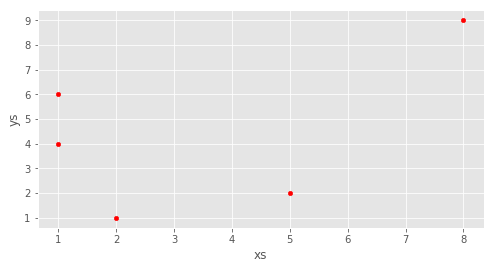

In [14]:
df.plot.scatter('xs','ys',color='red')

In [16]:

df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

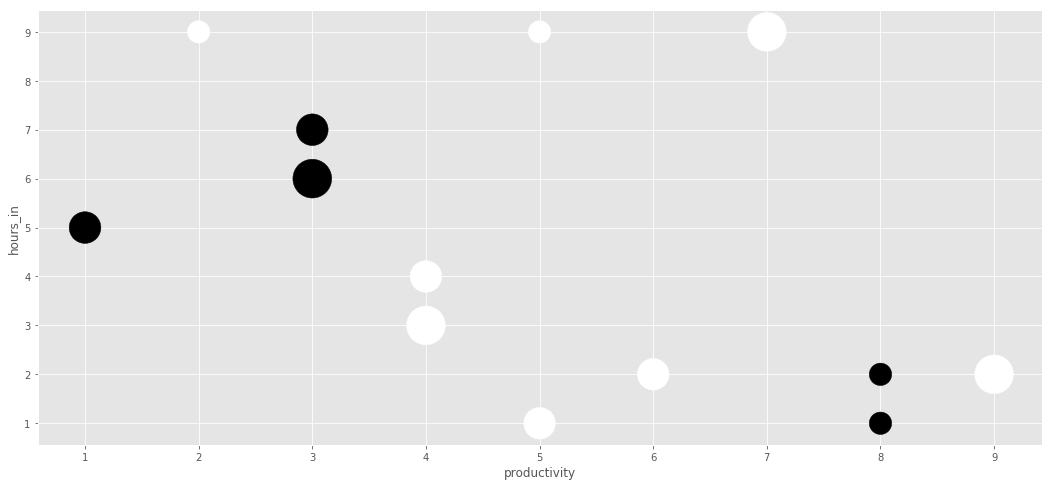

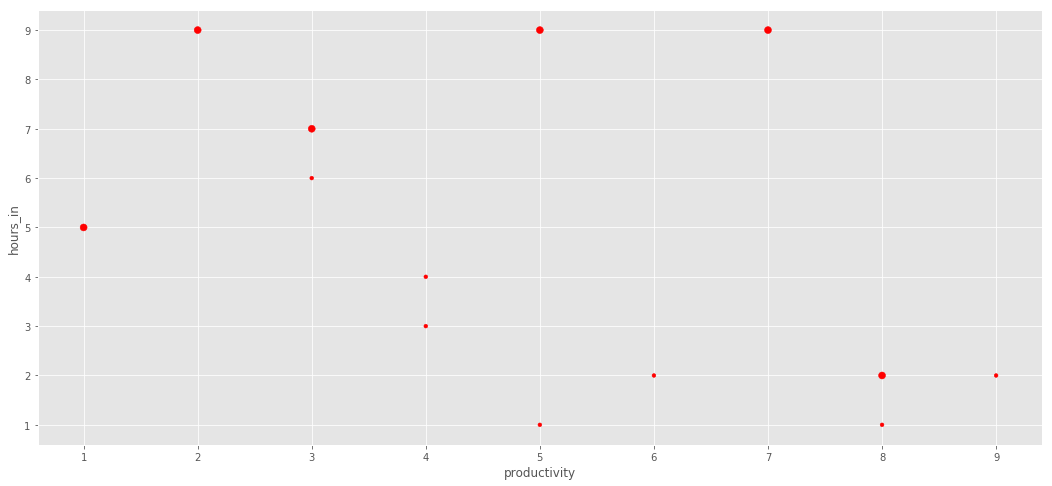

In [37]:

rcParams['figure.figsize']=18,8
df.plot.scatter('productivity','hours_in',s=df.happiness*500,c=df.caffienated)
df.plot.scatter('productivity','hours_in',s=[14,48],c='red')

In [38]:

df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

In [39]:
df

,revenue,advertising,month
0,57,2.1,0
1,68,1.9,1
2,63,2.7,2
3,71,3.0,3
4,72,3.6,4
5,90,3.2,5
6,80,2.7,6
7,62,2.4,7
8,59,1.8,8
9,51,1.6,9


(0, 12)

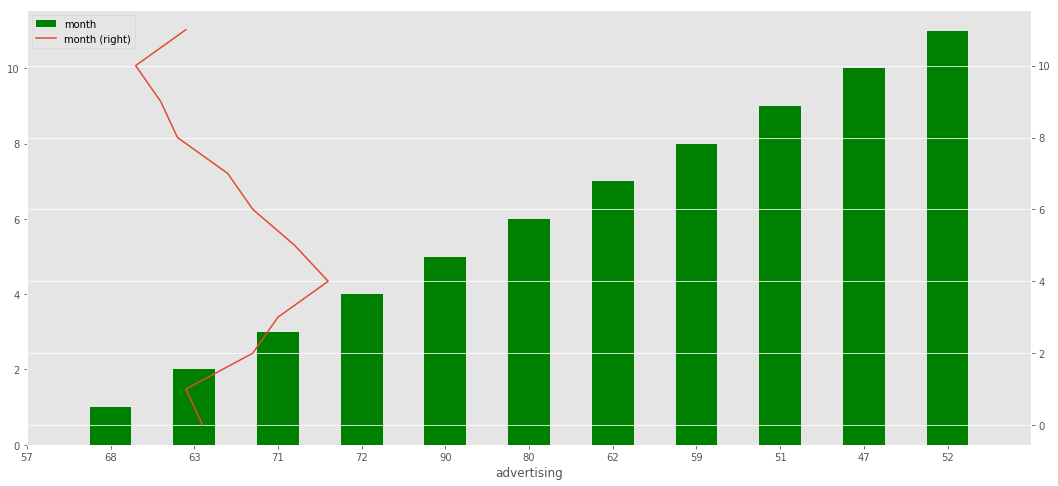

In [63]:
ax=df.plot.bar('revenue','month',color='green')
df.plot.line('advertising','month',secondary_y=True,ax=ax)
ax.set_xlim(0,12)